In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 挖掘数据的分布信息
我们需要使用多变量分析的方法更加深入的分析房价和其他变量之间的统计关系。<br>
**一共需要对4个假设进行验证:**
- 常态——也就是说数据是否服从正态分布。这个特性很重要，因为很多统计方法论测试都依赖于它。如果只是检验了单变量SalePrice的正态分布，但是这并不能保证多变量正态分布。如果多变量也能服从正太分布，那么可以避免很多问题，比如说，异方差性。
- 同方差——
- 线性度——常用的用于发现线性度的方法就是画出散点图和找出线性模式。如果没有呈现线性关系，那么我们可能需要对数据进行映射，从而使映射后的数据和因变量呈现线性关系。
- 相关性错误的遗漏——

### 寻找常态
通过以下两种途径来找：
- 直方图
- 正态概率图

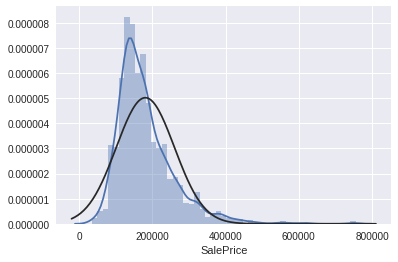

In [5]:
#画出SalePrice分布图
sns.distplot(df_train['SalePrice'], fit=norm)

通过可视化因变量的分布，可以看出，它的分布还是很均匀的，而且近似正态分布

In [6]:
#获取相应分布图的特征系数
(mu, sigma) = norm.fit(df_train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

mu = 180921.20 and sigma = 79415.29


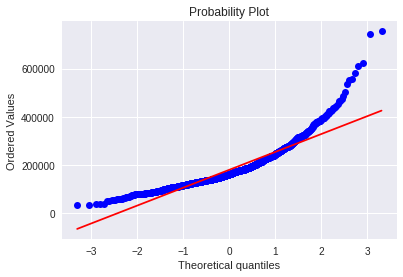

In [7]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

** 从上图上可以看出，我们可以看到，SalePrice没有呈现正太分布，它存在峰度差异，还有正向偏度，没有贴合斜线。但是，只要对数据进行简单的映射就可以。鉴于是出现了正向偏度，那么我们就可以对它使用对数log来进行映射处理**

In [8]:
#输出SalePrice的偏度和峰度
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


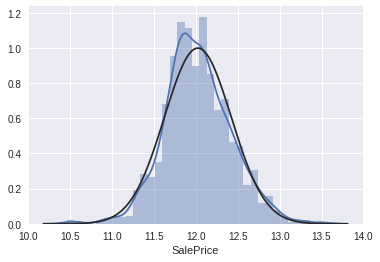

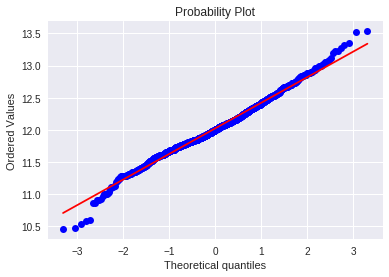

In [9]:
df_train_new = df_train.copy()
df_train_new['SalePrice'] = np.log(df_train_new['SalePrice'])

sns.distplot(df_train_new['SalePrice'], fit=norm)

fig = plt.figure()
res = stats.probplot(df_train_new['SalePrice'], plot=plt)
plt.show()

In [10]:
#上图显示，使用对数转换可以很有效地对数据i进行矫正,恢复df_train，并输出mu，sigma
mu, sigma = norm.fit(df_train_new['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

mu = 12.02 and sigma = 0.40


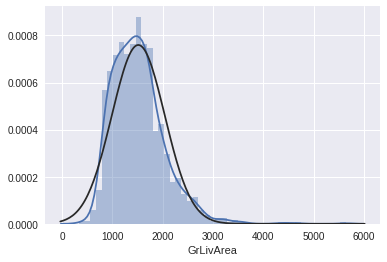

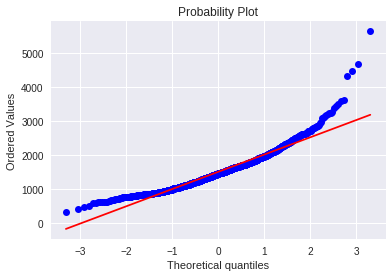

In [11]:
#GrLivArea
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [12]:
#同样的对它进行对数映射处理
df_train_new['GrLivArea'] = np.log(df_train['GrLivArea'])

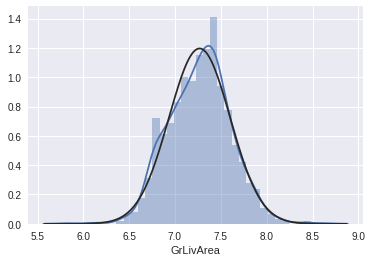

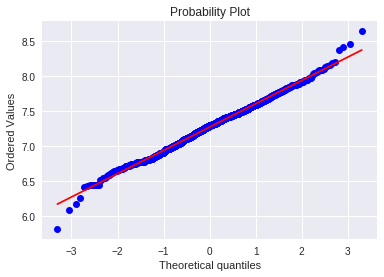

In [13]:
sns.distplot(df_train_new['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_new['GrLivArea'], plot=plt)

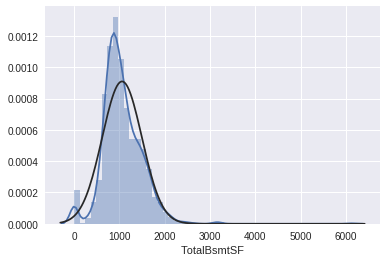

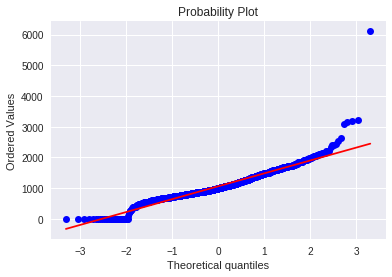

In [14]:
#TotalBstmSF
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

**从上图我们可以得到以下信息:**
- 存在偏度
- 出现地下库面积为0的情况。并不服从整体数据的正态分布。
- 由于有0值存在，所以我们无法使用对数log函数进行映射转换
为了应用对数映射转换，我们把数据分成两个部分，包含地下库和不包含地下库。然后，我们会对包含地下库的数据进行对数映射转换。

In [15]:
df_train_new['hasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train_new.index)
df_train_new['hasBsmt'] = 0
df_train_new.loc[df_train_new['TotalBsmtSF']>0,'hasBsmt'] = 1

In [16]:
df_train_new.loc[df_train_new['TotalBsmtSF']==1,'TotalBsmtSF'] = np.log(df_train_new['TotalBsmtSF'])

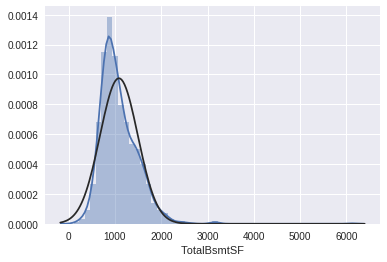

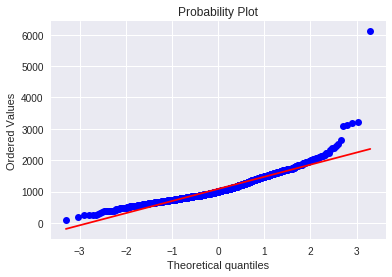

In [17]:
#画出他们的分布图和分位图
sns.distplot(df_train_new[df_train_new['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_new[df_train_new['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# 画出各个关键特征与saleprice之间的散点关系图

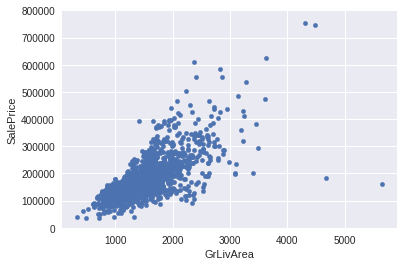

In [18]:
#画出占地面积变量(GrLivArea)和房价变量(SalePrice)的散点图
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## 如上图所示，GrLivArea和SalePrice样本呈现很强的线性相关性

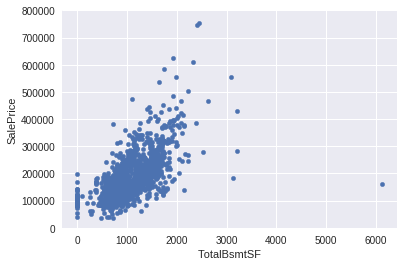

In [19]:
#画出地下库使用面积(TotalBsmtSF)和房价(SalePrice)的关系
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**如上图所示，也呈现很强的相关性，但是TotalBsmtSF为0的时候，房价也会上涨**

# 同方差探索

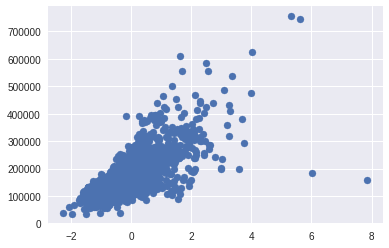

In [20]:
plt.scatter(StandardScaler().fit_transform(df_train['GrLivArea']), df_train['SalePrice'])

**把上图和没有经过标准化处理的图进行比较发现，之前的图片呈现圆锥形状，而这个图像呈现出比较匀称的长方形图像。这就是标准化(数据映射)的魅力**

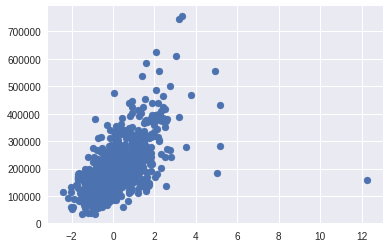

In [21]:
#同样的查看地下库变量TotalBsmtSF和SalePrice之间的散点关系图
plt.scatter(StandardScaler().fit_transform(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF']), 
            df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

# 与类目变量之间的关系探索

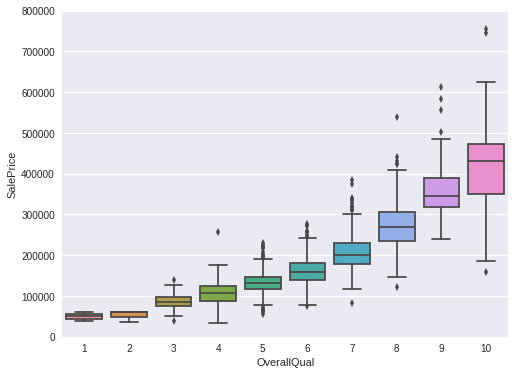

In [22]:
#建筑材料和完工质量(OverallQual)和房价(SalePrice)之间的关系
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**如上图所示，房价的中位数以及分位数都随着OverallQual的值递增而递增，表示这两者之间存在明显的正相关性**

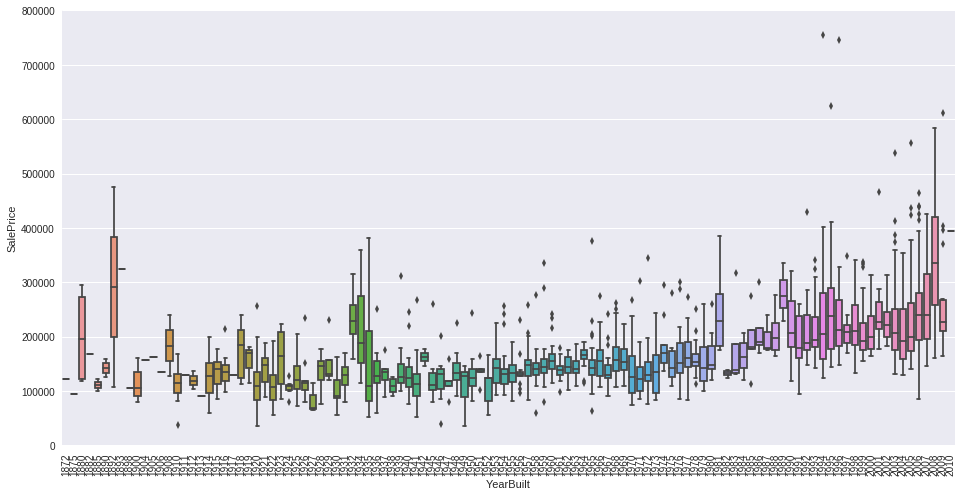

In [23]:
#建成年份(YearBuilt)和房价(SalePrice)之间的关系
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

**上图所示，没有看到明显的相关性，但是年份越新的建筑会比年份老的建筑价值要高** 
<br>
<br>
**到目前为止，我们只是根据自己的直觉和经验，对数据进行了初步的分析。尽管也得到了一些比较积极有效的进展，但是不可否认的，以上的分析方法过于主观。作为工程师，对于这种方式我并不满意。接下来，我们使用更为客观的分析方法进行分析**
<br>
- 相关矩阵(热力图)
- 画出相关性强的两个变量之间的散点图

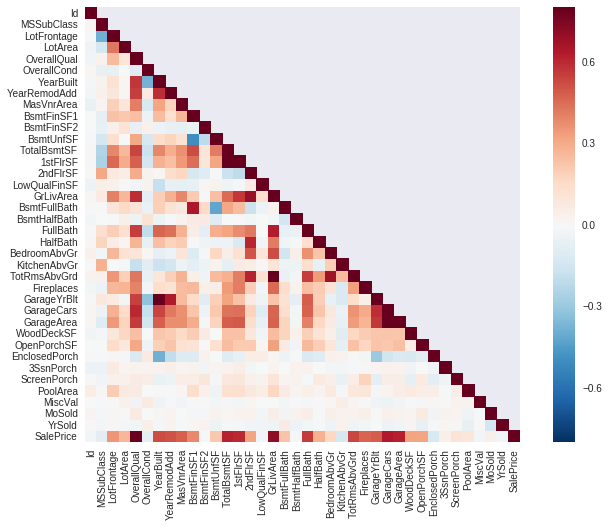

In [24]:
#计算出相关矩阵
corrmat = df_train.corr()
#得到相关矩阵的下三角的掩码
mask = np.array(corrmat)
mask[np.tril_indices_from(mask)] = False
#画出相关矩阵对应的热力图
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,mask=mask, vmax=.8, square=True)

In [25]:
#得到相关性最强的前10个特征之间的相关矩阵，以及画出他们的热力图
k = 10
#1、先根据相关矩阵得到与SalePrice相关性最强的前10个特征
corrmat_largest = corrmat.nlargest(k, 'SalePrice')
print type(corrmat_largest)

<class 'pandas.core.frame.DataFrame'>


In [26]:
cols = corrmat_largest['SalePrice'].index
print cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')


In [27]:
cm = np.corrcoef(df_train[cols].values.T)
print cm

[[ 1.          0.7909816   0.70862448  0.6404092   0.62343144  0.61358055
   0.60585218  0.56066376  0.53372316  0.52289733]
 [ 0.7909816   1.          0.59300743  0.60067072  0.56202176  0.5378085
   0.47622383  0.55059971  0.42745234  0.57232277]
 [ 0.70862448  0.59300743  1.          0.46724742  0.46899748  0.4548682
   0.56602397  0.63001165  0.82548937  0.19900971]
 [ 0.6404092   0.60067072  0.46724742  1.          0.88247541  0.43458483
   0.43931681  0.46967204  0.36228857  0.53785009]
 [ 0.62343144  0.56202176  0.46899748  0.88247541  1.          0.48666546
   0.48978165  0.40565621  0.33782212  0.47895382]
 [ 0.61358055  0.5378085   0.4548682   0.43458483  0.48666546  1.
   0.81952998  0.32372241  0.28557256  0.391452  ]
 [ 0.60585218  0.47622383  0.56602397  0.43931681  0.48978165  0.81952998
   1.          0.38063749  0.40951598  0.28198586]
 [ 0.56066376  0.55059971  0.63001165  0.46967204  0.40565621  0.32372241
   0.38063749  1.          0.55478425  0.46827079]
 [ 0.53372

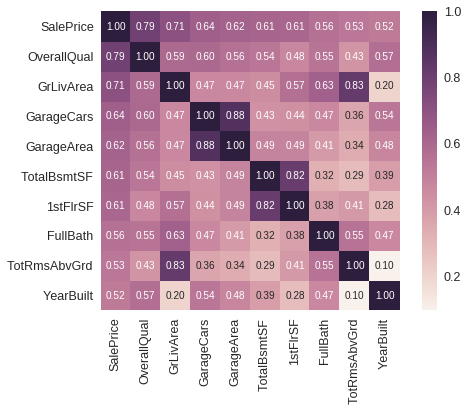

In [28]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 根据上面的热力图，我们可以的到下面的结论:
- 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea'，跟SalePrice有很强的相关性
- 'GarageCars','GarageArea'之间的相关性太强，对SalePrice的影响比较类似，所以我们只选用跟SalePrice相关性更强的GarageCars
- TotalBsmtSF,1stFIrSF之间的相关性也很强，而且对SalePrice的影响比较类似，所以我们只选用跟SalePrice相关性更强的TotalBsmtSF,或者我们把TotalBsmtSF，1stFIrSF，2ndFlrSF相加起来作为总的地库特征
- FullBath
- TotRmsAbvGrd,GrLivArea之间的相关性也很强，但是他们对SalePrice的影响差别有点大，所以同时保留这两个变量，但是原文的作者只保留GrLivArea
- YearBuilt与SalePrice之间的相关性不是很明显。但是可以做一些时序分析，挖掘更多的信息

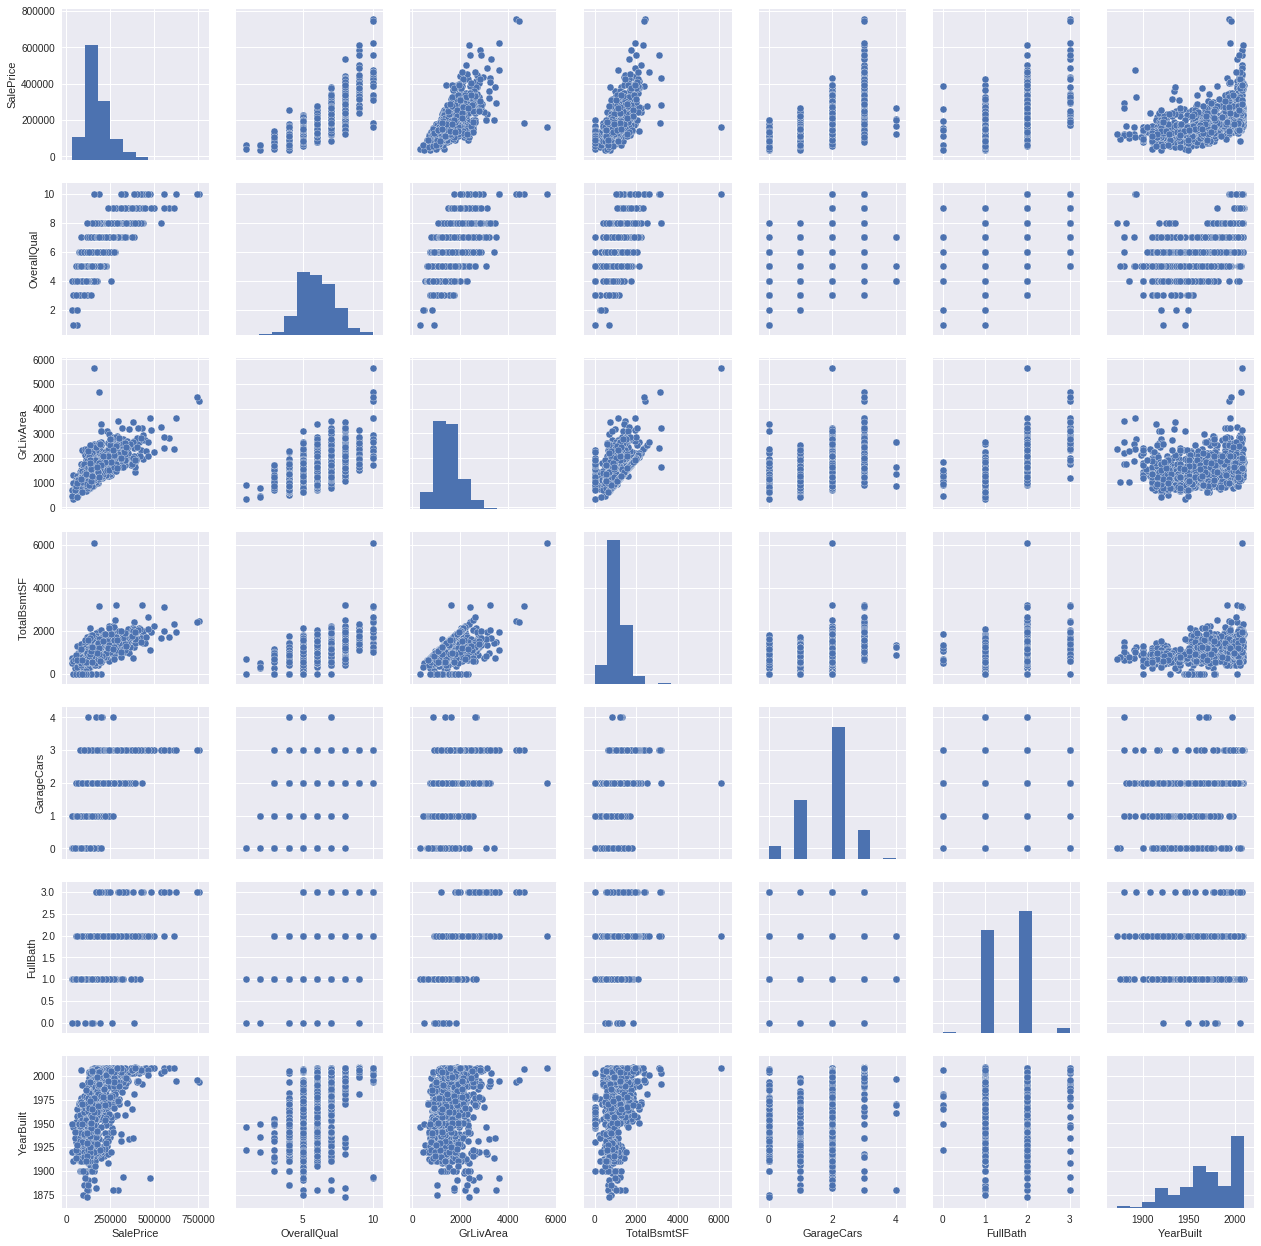

In [29]:
#画出以上分析筛选出来的变量与SalePrice之间的散点图
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

In [30]:
df_train[cols].dtypes

SalePrice      int64
OverallQual    int64
GrLivArea      int64
TotalBsmtSF    int64
GarageCars     int64
FullBath       int64
YearBuilt      int64
dtype: object

# 缺失数据
关于缺失值的处理需要回答2个问题：
- 缺失值的缺失程度
- 缺失值是随机的还是存在模式可循

In [31]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
print total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [32]:
print percent[:10]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64


In [33]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- 处理缺失数据时，如果一项特征数据缺失率达到了15%，我们就应该删除掉这一个特征，当作它从来没有存在过。这也意味着我们从来没有想过采用有效的方式来填补这些缺失值。这样的特征有PoolQC, MiscFeature, Alley。
- 同时，我们可以发现一个规律，以Garage-开头命名的特征，缺失值数量都是81个。可以断定这些数据来自同一个观测集。由于前面我们已经采用了相同命名模式的特征GarageCars。所以这些存在缺失值的GarageX特征们都不纳入考虑范围。
- 同样的处理方式应用在BsmtX上面
- MasVnrArea和MasVnrType跟YearBuilt、OverallQual有比较强的相关性。所以暂时可以不把他们纳入考虑范围
- 对于Electrical特征，由于只是缺失了一个值，所以我们把这一相应的样本删除掉。这样的处理方式并不影响样本的完整性和完备性

In [34]:
#PoolQC特征的处理
df_train[df_train['PoolQC'].notnull()]['PoolQC'].head()

(1460, 63)

In [35]:
#PoolQC中的NaN表示该房子不带游泳池，所以把NaN变成了None
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

(1459, 63)

In [36]:
#MiscFeature,它的NaN值设置为None
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

0

In [ ]:
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')

In [ ]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [ ]:
#LotFrontage,表示房屋周边的街道面积。使用邻居的LotFrontage数据的中位数来填充。
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#GarageType, GarageFinish, GarageQual and GarageCond 使用None来替代
all_data[['GarageType','GarageFinish','GarageQual', 'GarageCond']] = all_data[['GarageType','GarageFinish','GarageQual', 'GarageCond']].fillna('None')

In [ ]:
all_data[['GarageType','GarageFinish','GarageQual', 'GarageCond']].isnull().sum()

In [ ]:
#用0来替换掉NaN
all_data[['GarageYrBlt','GarageArea','GarageCars']] = all_data[['GarageYrBlt','GarageArea','GarageCars']].fillna(0)

In [ ]:
all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = \
all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [ ]:
all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = \
all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

In [ ]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [1]:
#使用众数来填充
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

NameError: name 'all_data' is not defined

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

## 上面对缺失值的处理方式是简单粗暴直接删除

# 离群点处理
离群点需要重视一点，因为离群点里的对模型会有很明显的影响，而且离群点常常会反映出一些特殊的行为或者情况。但是，下面我们通过一些散点图来看看离群点的分布情况。
<br>
对于离群点的定义的关键点在于设置一个阈值。为了便于进行这项工作，我们先对数据进行标准化，这里的标准化表示，对数据进行转化使之平均值为0，标准差为1

In [39]:
#对SalePrice列进行标准化

mid = df_train_new['SalePrice'][:,np.newaxis] #增加维度，变成narray数据
saleprice_scaled = StandardScaler().fit_transform(mid)
saleprice_scaled[:5]

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       [-0.5152254 ],
       [ 0.86943738]])

In [40]:
#argsort()从小到大排列，获得前面最小的10个值和后面最大的10个值
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [41]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


**从前面的输出可以看到，最小的10个值大小比较集中，而且离0点比较近。而最大的10个值大小比较分散，而且离0点比较远。但是到目前位置，我们还无法把这些大于7的值当作离群值来处理。**

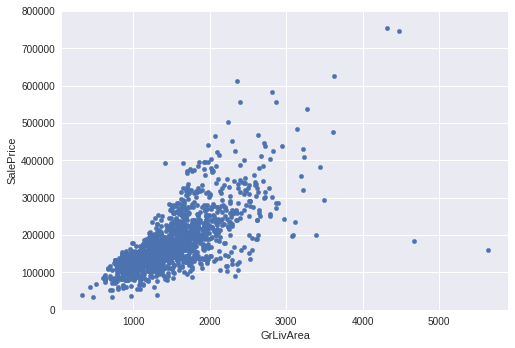

In [42]:
#双变量分析 saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### 我们看到右下角的两个GrLivArea值极大的点，完全不服从整体的线性关系。所以，直接删除掉
### 注意
对于那些离群点，也许删除是一种比较便捷的方式，但是如果把所有的特征里的离群点都删除掉了，会对我们的模型产生不好的影响。而且， 如果测试集里面也会存在离群点，那么就更不好处理，这样会导致过拟合，泛化能力差的反作用。所以，处理离群点的有效手段是提高模型的鲁棒性。

In [43]:
#删除掉前面提到的两个不满足线性关系的离群点,(技巧：删除行的时候，算出行对应的索引列表)
rm_id = df_train.sort_values(by='GrLivArea',ascending=False)[:2].index
print rm_id
df_train_new = df_train.drop(rm_id)
print df_train_new.shape

Int64Index([1298, 523], dtype='int64')
(1458, 81)


# 总结

- 通过对各个特征的观察，主观判断那些特征和房价有比较强的相关性。
- 接下来，生成所有特征的相关矩阵，并画出对应的热度图。
- 筛选出与房价相关系数最大的9个特征两两之间的相关性，也画出对应的热度图。
- 根据这9个特征之间的相关性，如果这两个特征跟房价都有比较强的相关性，同时特征之间也表现出比较强的相关性，那么我们就只选那个与房价相关性较强的那个特征。
- 最后，画出最终保留下来的特征和房价之间的，我们可以剔除那些对模型学习会产生不好的影响的离群点。
- 处理缺失值，如果以上筛选出来的特征中，它们对应的列数据存在缺失。那么，我们通过以下方式判断，这列数据该保留，还是该删除。保留下来之后，怎么处理缺失的数据，是删除掉缺失值对应的样本，还是补全缺失值。1)先看看缺失值的是否存在某种可遵循的模式，比如，同属一个来源的数据列之间它们的缺失值数量一样。2)看看缺失值所在列和房价是否存在线性关系。3)缺失值的数量占总个列数量的百分比
- 数据处理完，特征也筛选出来了。我们通过画出各个特征的分布图、分位图，看看他们是否服从正态分布。否则，对他们进行标准化处理，或者进行映射转换，使他们最后服从正态分布。（这里可以考虑一下先验分布，后验分布，共扼先验）
数据描述：
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality(建筑材料和完工质量)
- OverallCond: Overall condition rating
- YearBuilt: Original construction date(建成年份)
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area(地下库的使用面积)
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet (占地面积)
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale